# Prototyping Notebook

This jupyter notebook is for prototyping functionality for the web app in general.

## Data Creation

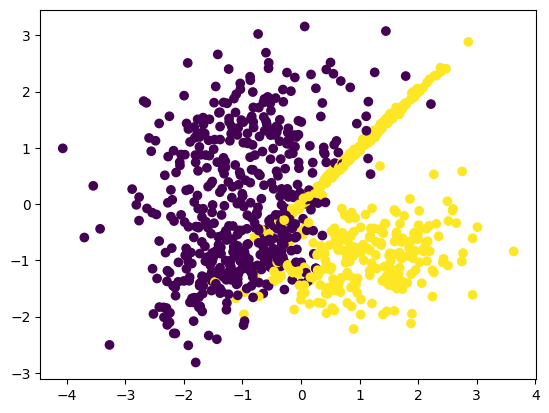

In [1]:
from sklearn.datasets import make_classification, make_circles, make_moons
from matplotlib import pyplot as plt

def plot_dataset(X, y):
    plt.scatter(x=X[:,0], y =X[:,1], c=y)

plot_dataset(*make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0))

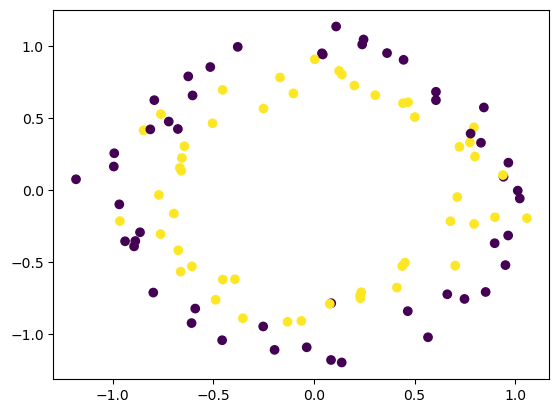

In [22]:
plot_dataset(*make_circles(n_samples=100, noise=0.1))

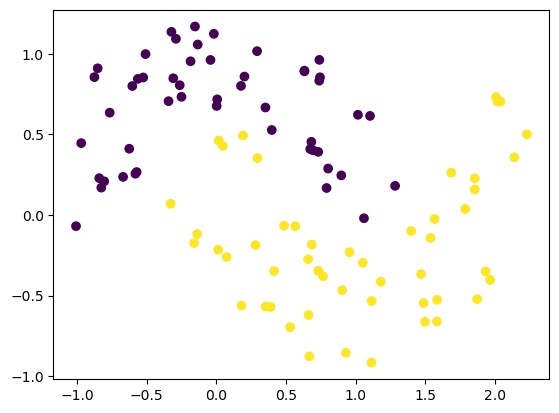

In [24]:
plot_dataset(*make_moons(n_samples=100, noise=0.2))

## Modelling

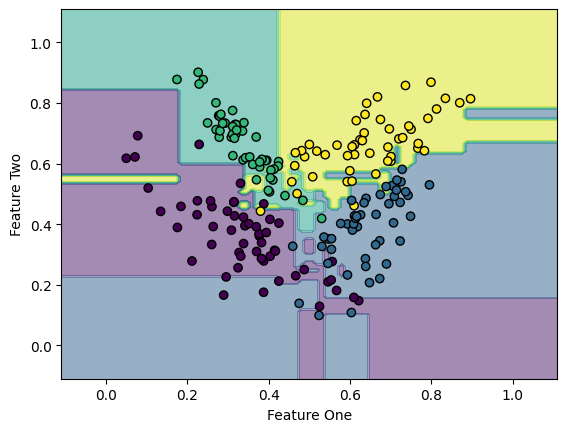

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.base import BaseEstimator
from sklearn.preprocessing import MinMaxScaler
import numpy as np

def plot_decision(estimator: BaseEstimator, X_train: np.ndarray, X_test: np.ndarray, y_test: np.ndarray) -> None:
    disp = DecisionBoundaryDisplay.from_estimator(estimator=estimator, X=X_train, alpha = 0.5, xlabel="Feature One", ylabel="Feature Two", eps=0.11)
    disp.ax_.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k')

X,y = make_classification(n_samples=1000, n_classes=4, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_clusters_per_class=1)
X = MinMaxScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
tree = DecisionTreeClassifier().fit(X_train, y_train)

plot_decision(tree, X_train, X_test, y_test)

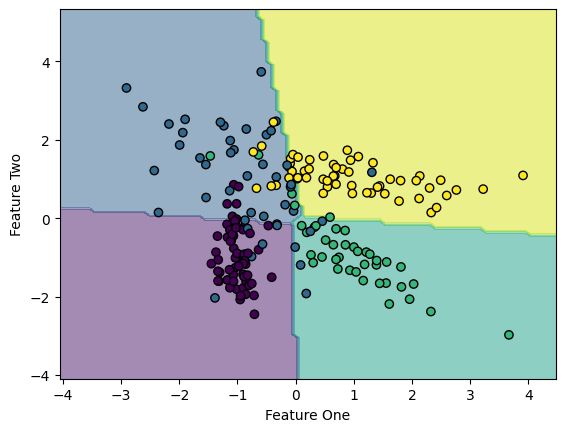

In [3]:
from sklearn.linear_model import LogisticRegressionCV

lr = LogisticRegressionCV().fit(X_train, y_train)
plot_decision(lr, X_train, X_test, y_test)

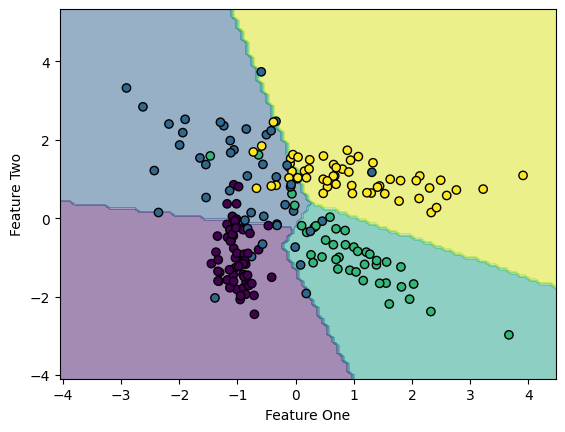

In [4]:
from sklearn.svm import SVC

svm = SVC(kernel='linear').fit(X_train, y_train)
plot_decision(svm, X_train, X_test, y_test)

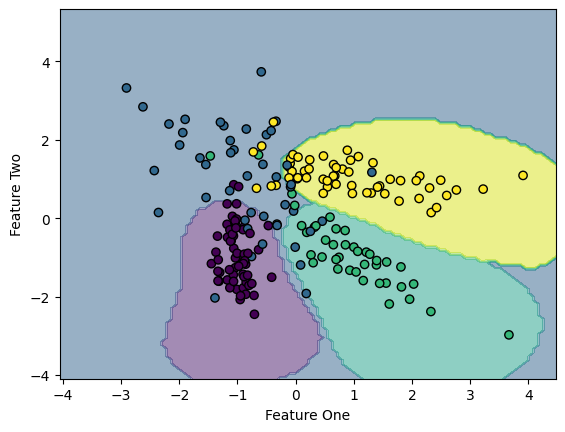

In [5]:
rbf_svm = SVC(kernel="rbf").fit(X_train, y_train)
plot_decision(rbf_svm, X_train, X_test, y_test)

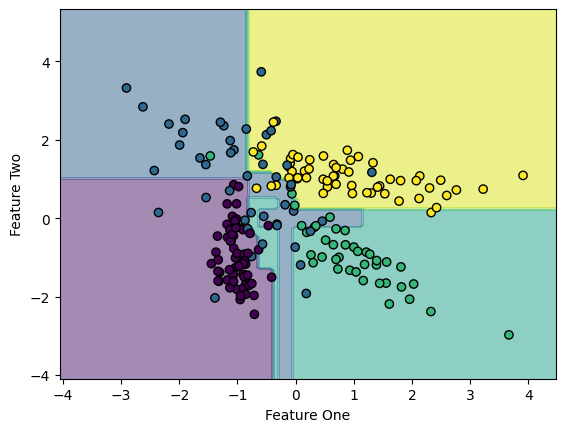

In [6]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier().fit(X_train, y_train)
plot_decision(ada, X_train, X_test, y_test)

/home/ldtcoop/projects/ml-guessing-game/env/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


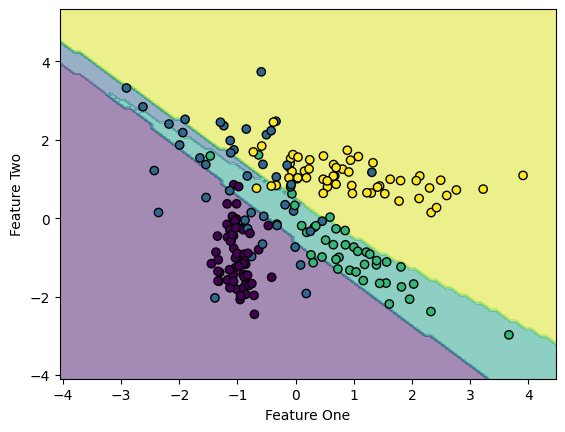

In [7]:
from sklearn.neural_network import MLPClassifier

def build_mlp(classes: int, X_train: np.ndarray, y_train: np.ndarray) -> BaseEstimator:
    return MLPClassifier(hidden_layer_sizes=(2, 8, classes)).fit(X_train, y_train)

mlp = build_mlp(4, X_train, y_train)
plot_decision(mlp, X_train, X_test, y_test)

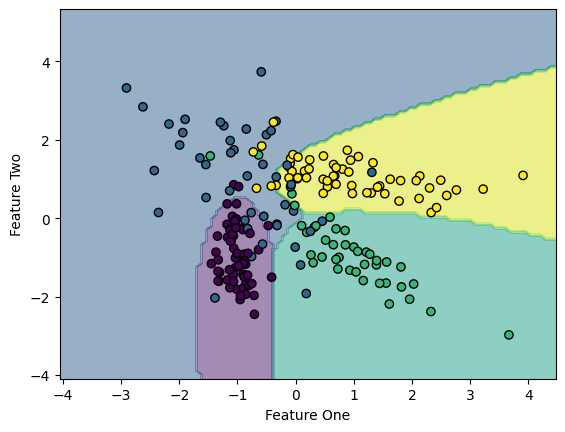

In [8]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB().fit(X_train, y_train)
plot_decision(GNB, X_train, X_test, y_test)